# Housing Price Prediction

In this project, we predict housing prices using the California Housing dataset. We will explore the dataset, preprocess the data, and train a Linear Regression model to predict house prices based on different features.


In [ ]:
import pandas as pd

# Load the Data Set from the URL
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

# Show the first rows of the dataset
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Data Information

### Basic Information
- **Dataset**: The California Housing dataset contains various features of homes in California. 
- **Columns**: We will be focusing on the `median_house_value` column as our target.

### Summary Statistics


In [10]:
# Show dataset info and describe basic statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

# Show dataset info and describe basic statistics
print(df.info())
print(df.describe())

In [13]:
# Check for missing values in the dataset
df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

### Handling Missing Data
We will fill missing values in the `total_bedrooms` column with the **median** value of the column.

In [15]:
# Fill missing values in 'total_bedrooms' column with the median value
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

### Encoding Categorical Variables
We will one-hot encode the `ocean_proximity` feature, which is categorical.

In [30]:
# One-hot encode 'ocean_proximity' column

#df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# This command changed the ocean_proximity column to dummies for one-hot encoding. 
# However, if you run this again, it will raise an error because the 'ocean_proximity' column is already replaced by dummies.

### Defining Features and Target
We will define our features `X` and target `y`. The target variable is `median_house_value`.

In [21]:
# Define the features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

### Data Scaling
We will scale the feature data using `StandardScaler` to normalize the features for better performance in the model.

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split
We will split the dataset into training and test sets (80% training, 20% testing).

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training a Linear Regression Model
We will use a simple Linear Regression model to predict the housing prices.

In [24]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

### Model Evaluation
We will evaluate the model using **Mean Absolute Error (MAE)** and **R² Score**. We will also plot the predicted vs actual prices.

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error: 50670.73824097193
R² Score: 0.6254240620553605


### Visualization
We will plot the **Actual vs Predicted** prices to visually inspect how well our model is performing.

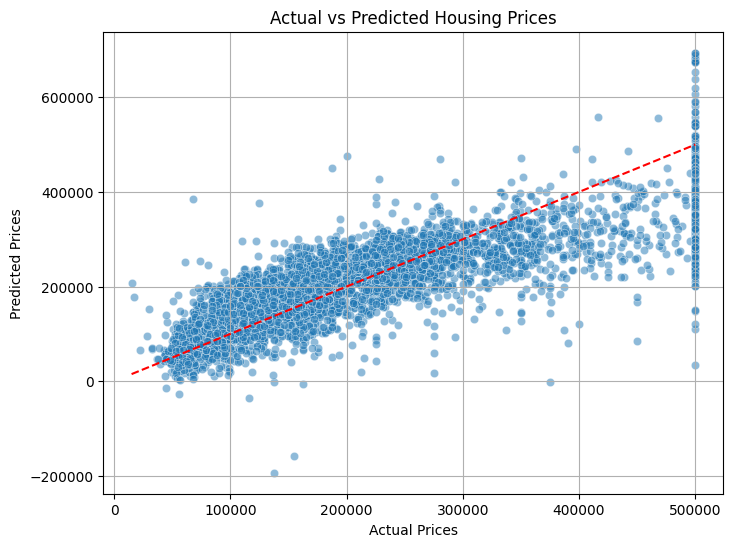

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Add the y = x line for comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.show()


### Conclusion

- **Linear Regression** has given us a basic understanding of the relationship between features and housing prices.
- The **R² Score** indicates how well the model fits the data. If we improve this, we could explore more complex models.
- Future improvements could involve trying models like **Random Forests**, **Gradient Boosting**, or using **Hyperparameter Tuning** for better accuracy.

Thank you for exploring this project!